In [1]:
import cryo_em_select as cryo
from pathlib import Path
import os

model = cryo.CryoEmNet(batch_size=4, image_size=(224,224,1), gauss_label=True)
model.train(
    filepath=Path(str(os.getcwd())) / 'test_model' / 'checkpoint',
    learning_rate=10 ** -2, 
    epochs=20,
    save_log=False,
    save_model=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 8)  80          ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/cinderella_31/train

1/1 [==============================] - 1s 813ms/step


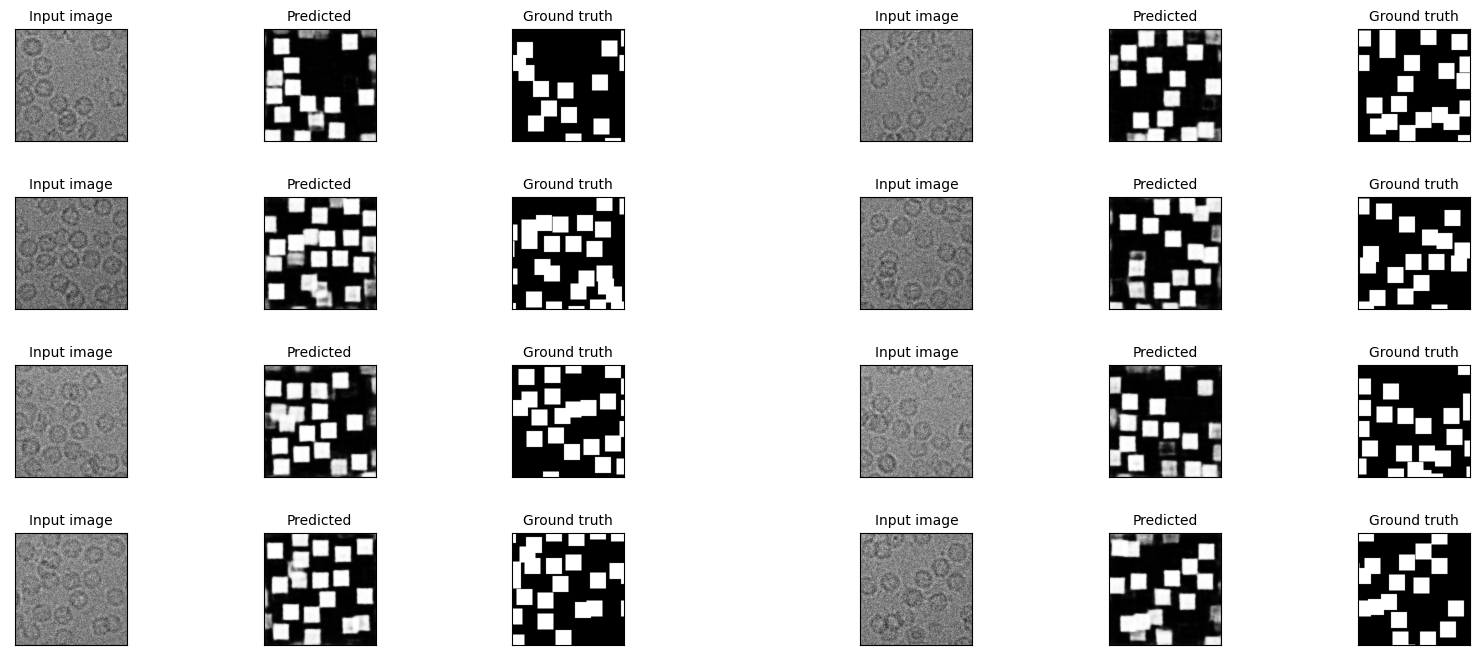

In [2]:
from pathlib import Path

path = Path('FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png')
model.show_predictions(path)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 8)  80          ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

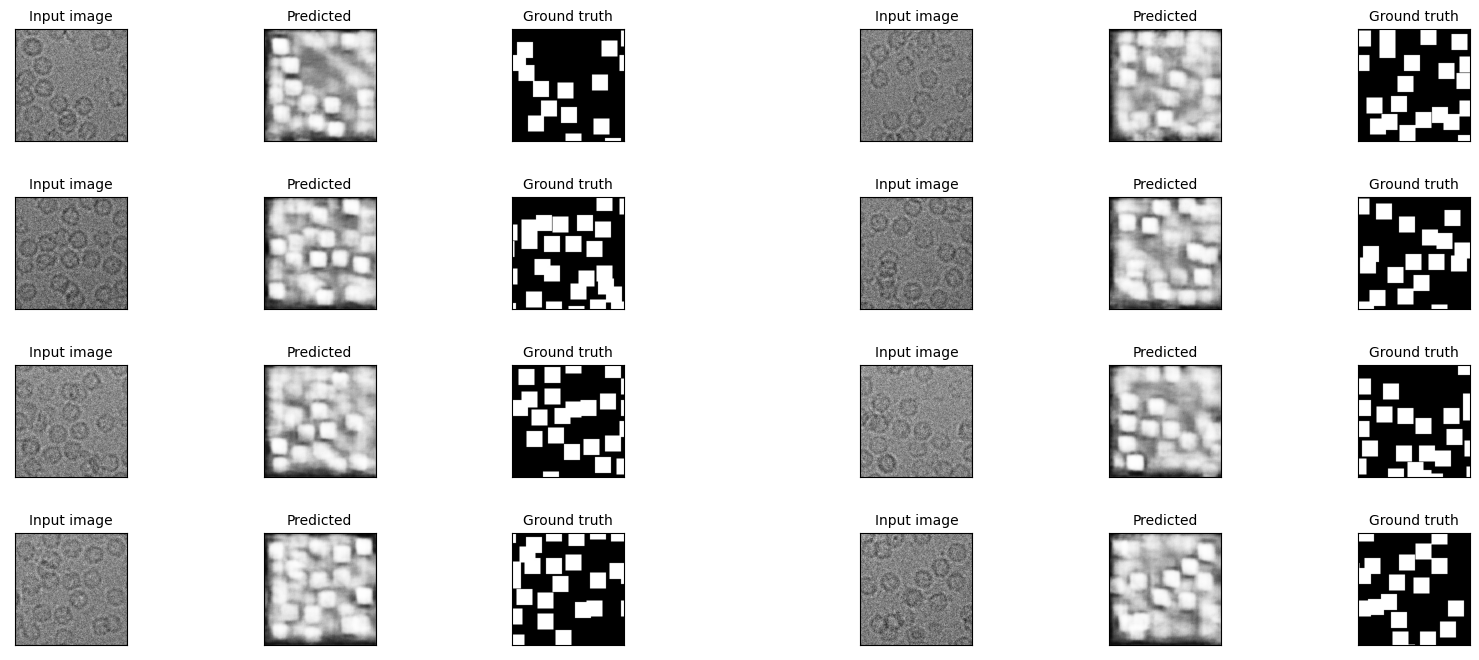

In [1]:
import cryo_em_select as cryo
model_loaded = cryo.CryoEmNet(batch_size=4, image_size=(224,224,1))
model_loaded.model.load_weights("test_model/checkpoint")

from pathlib import Path

path = Path('FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png')
model_loaded.show_predictions(path)

In [ ]:
import os
from pathlib import Path

p = Path(os.getcwd()) / 'output'

for file in p.iterdir():
    if file.suffix == '.csv':
        os.rename(str(file), os.path.join(os.getcwd(), 'data\\label_annotation', str(file.name)))
    else:
        os.rename(str(file), os.path.join(os.getcwd(), 'data\\raw_data', str(file.name)))

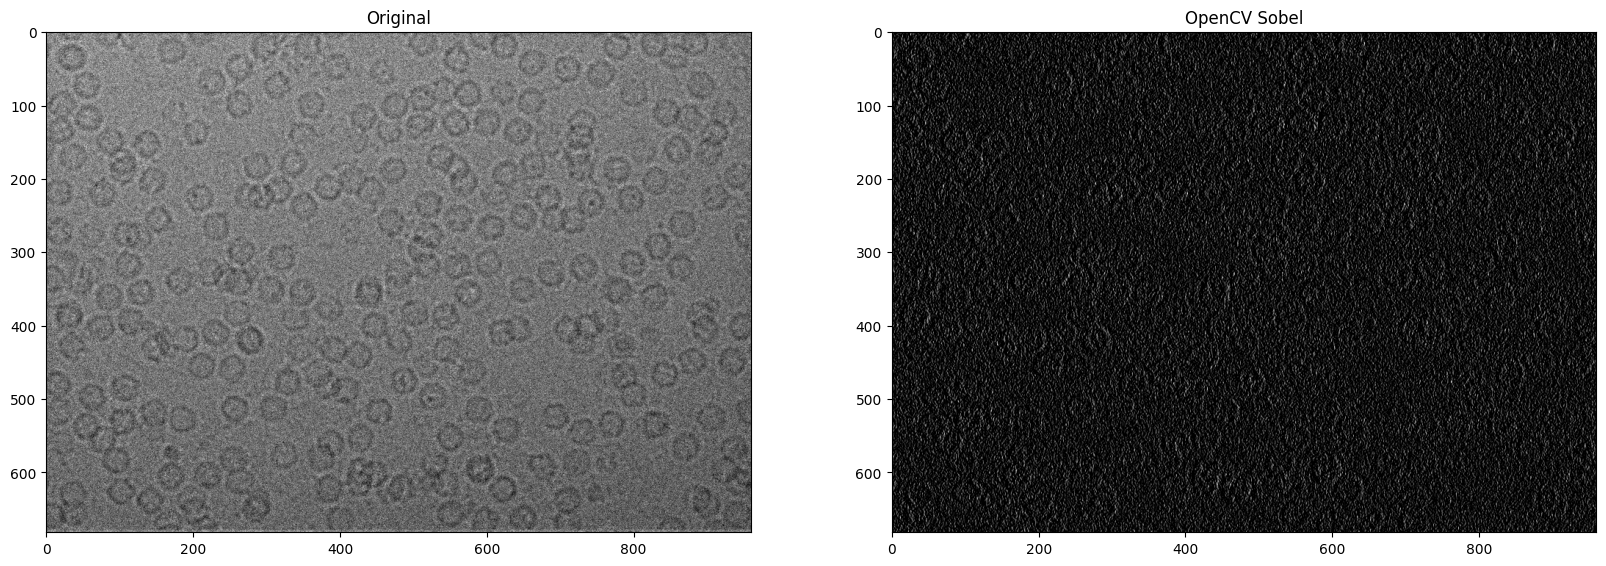

In [ ]:
from pathlib import Path
import cv2
from matplotlib import pyplot as plt
import os


p = Path(os.getcwd() + '/data/raw_data/' + 'FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png')
forestGray = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
forestEdges2 = cv2.Sobel(forestGray, cv2.CV_8U, 1, 0, ksize=3)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for ax, im, title in zip(axes, [forestGray, forestEdges2], ['Original', 'OpenCV Sobel']):
    ax.set_title(title)
    ax.imshow(im, cmap='gray');

(622, 900)


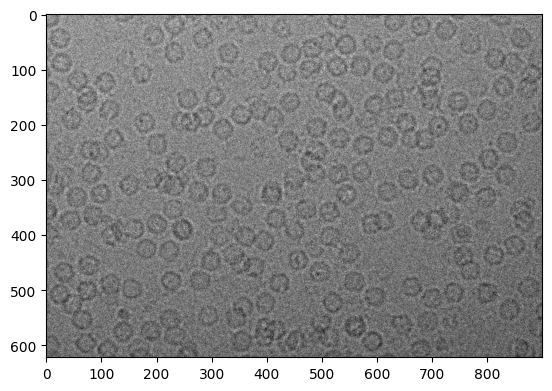

In [28]:
from pathlib import Path
import cv2
from matplotlib import pyplot as plt
import os

p = Path(os.getcwd() + '/data/raw_data/' + 'FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png')
img = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
img[0:30] = 0
img[:,:30] = 0
img[:,-30:] = 0
img[-30:] = 0
img = img[30:-30,30:-30]
print(img.shape)
plt.imshow(img, cmap='gray')